In [ ]:
# Data Analysis: Exploratory Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger_setup import SetupLogger
# Assuming this class is defined in scripts/
from data_preprocessing import DataPreprocessor
from data_analysis import DataAnalysis
logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (14, 7)

In [2]:
# Initialize class instances
processor = DataPreprocessor(logger=logger)
analyzer = DataAnalysis(logger=logger)

In [3]:
tsla_data = processor.load_data('TSLA')
bnd_data = processor.load_data('BND')
spy_data = processor.load_data('SPY')

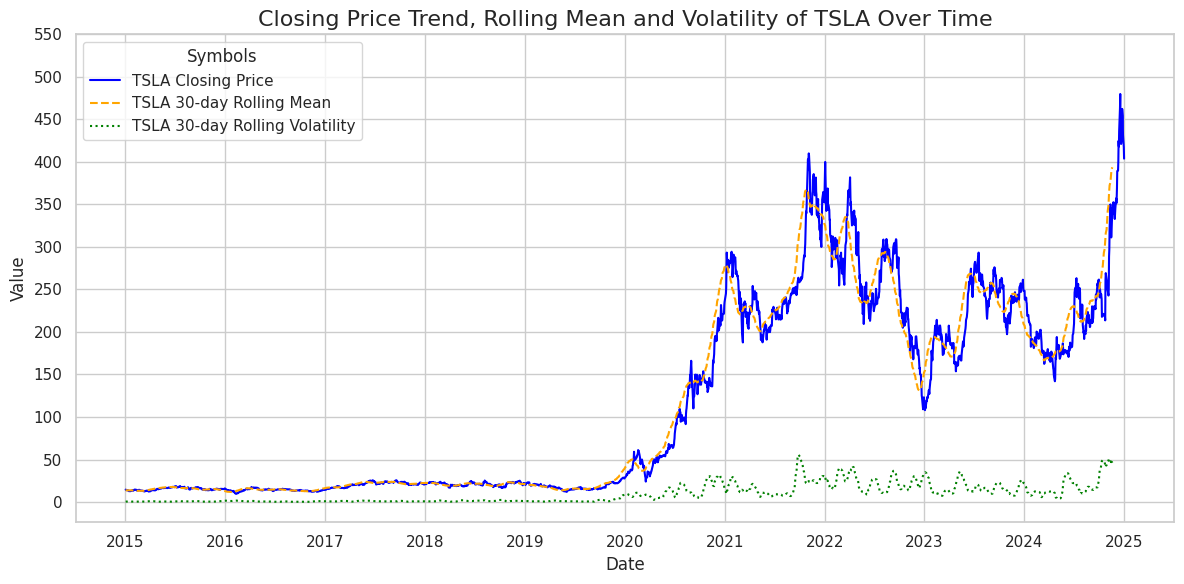

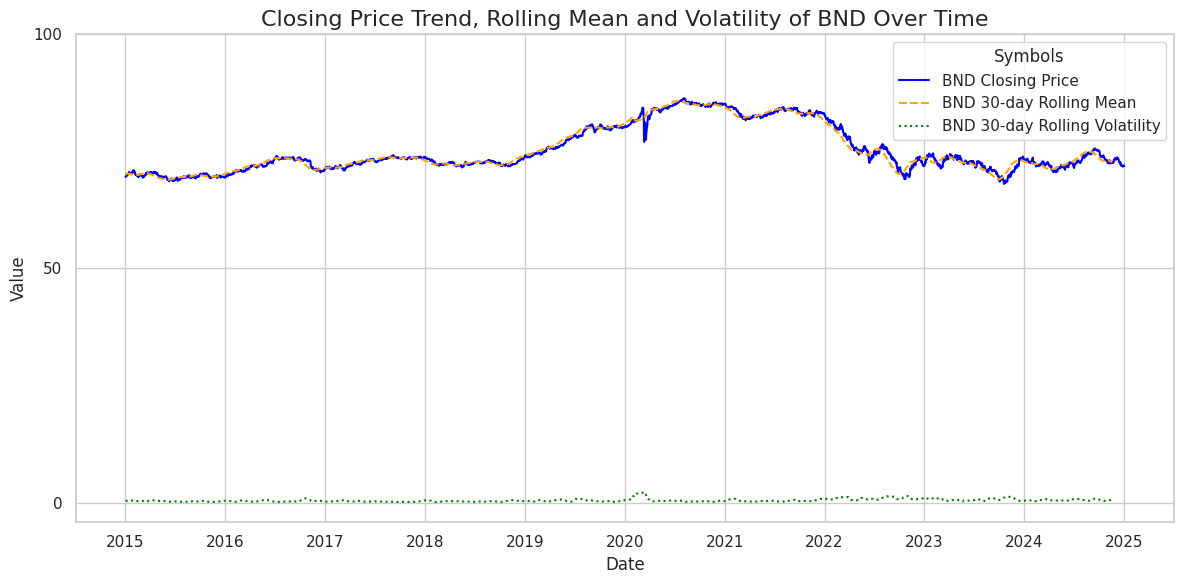

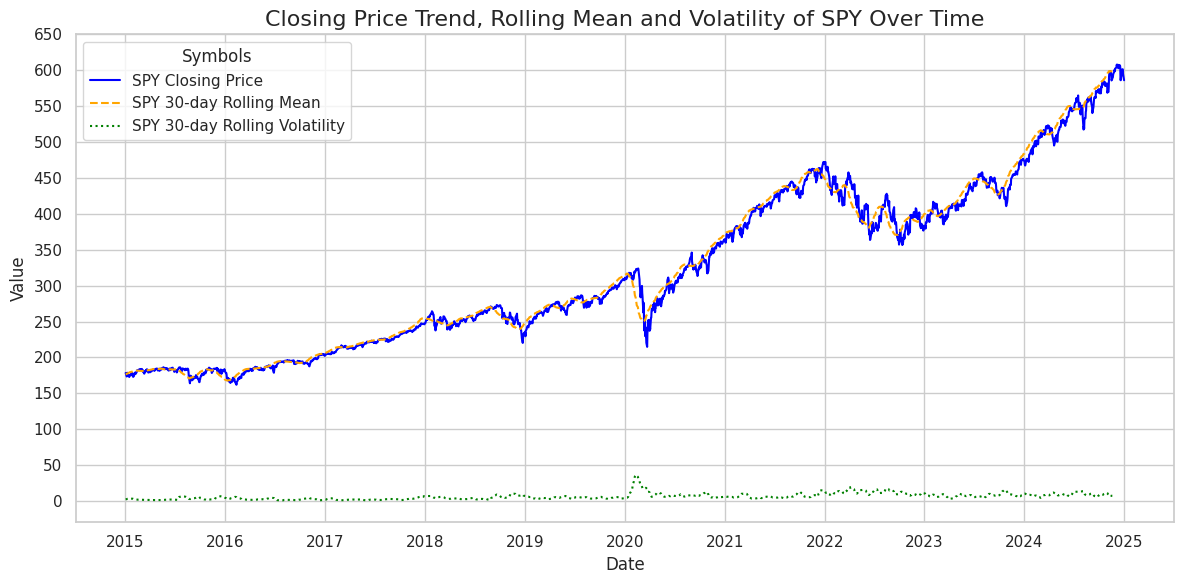

In [4]:
# Define dictionary for stock data for TSLA, BND, SPY
data_dict = {
    'TSLA': tsla_data,  
    'BND': bnd_data,    
    'SPY': spy_data    
}

# Plotting the closing price for a stock symbol (e.g., 'TSLA')
analyzer.analyze_price_trend(data_dict)


**Plotting Percentage Change**

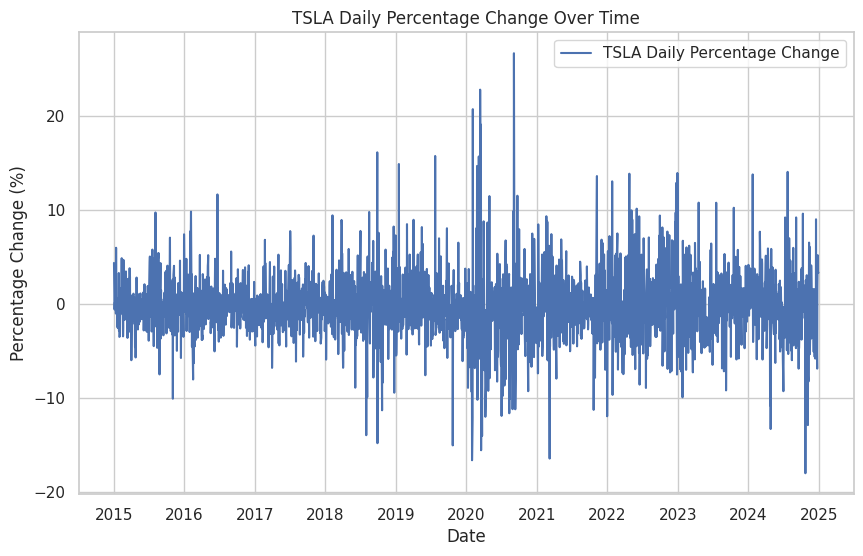

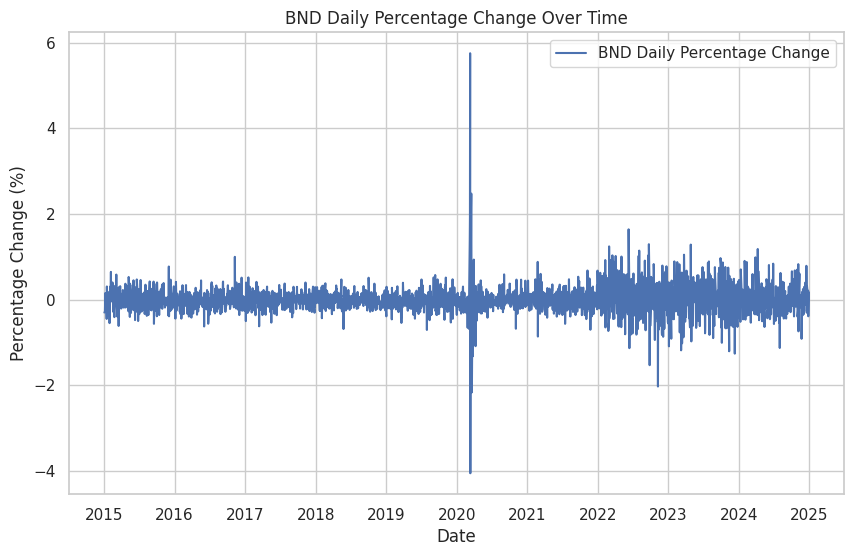

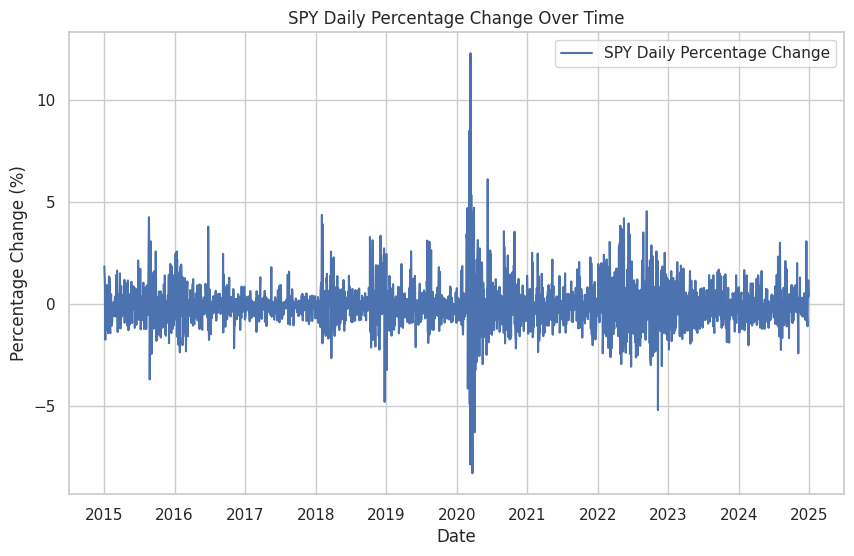

In [5]:
# Plotting the closing price for a stock symbol (e.g., 'TSLA')
analyzer.plot_percentage_change(data_dict)


**Perform outlier detection to identify significant anomalies**
- Analyze days with unusually high or low returns

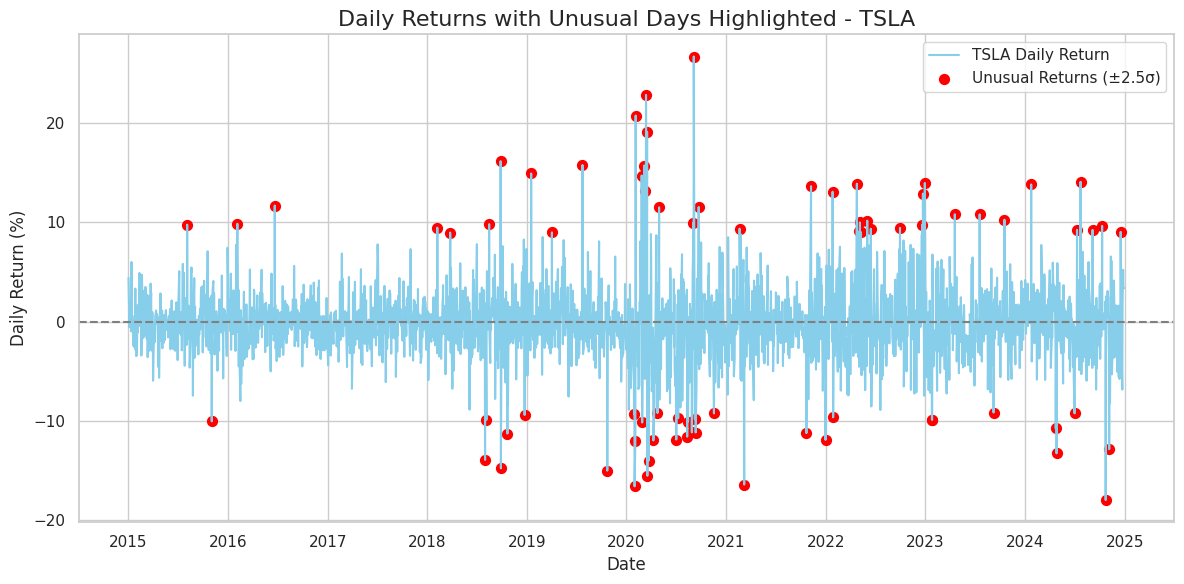

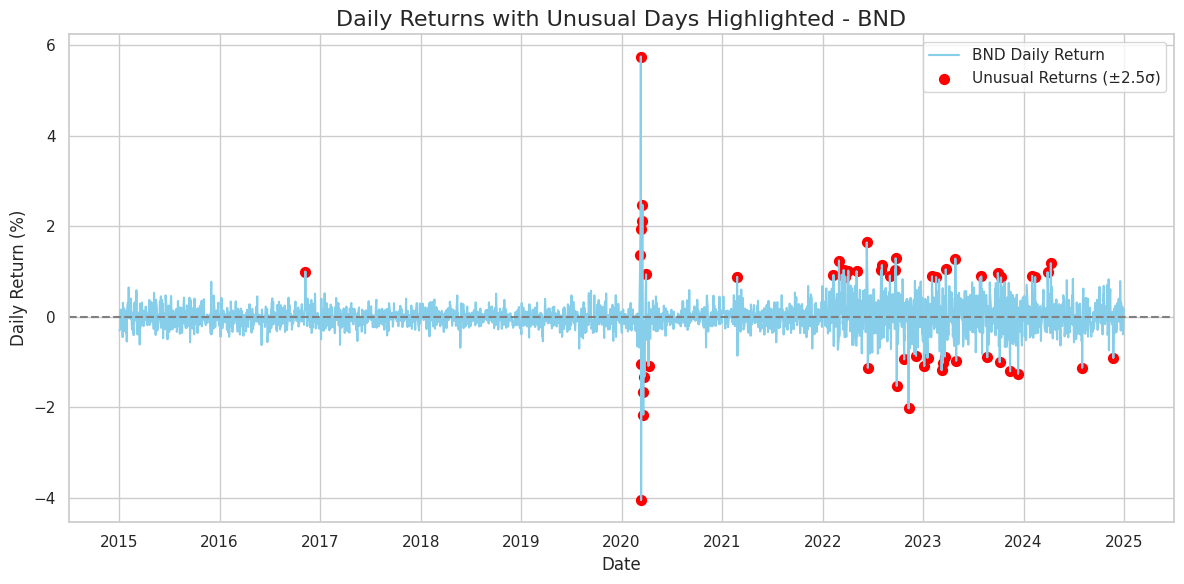

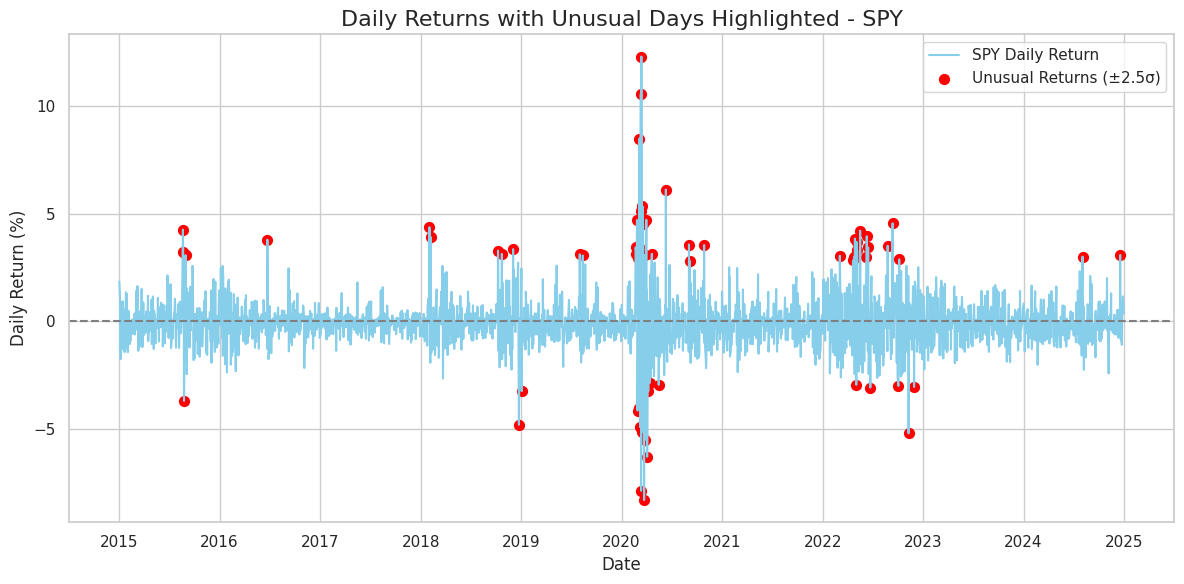

In [6]:
analyzer.plot_unusual_daily_return(data_dict)